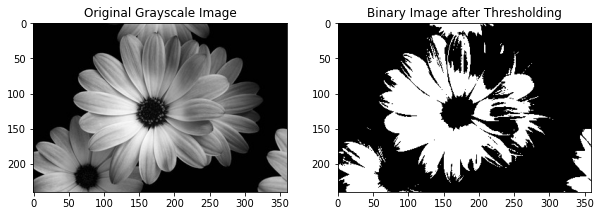

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('im3.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if image is None:
    raise ValueError("Image not found or path is incorrect")

# Set the threshold value
threshold_value = 127 # You can adjust this value as needed

# Perform global thresholding
_, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Display the original and segmented images
plt.figure(figsize=[10,5])

plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Binary Image after Thresholding")
plt.imshow(binary_image, cmap='gray')

plt.show()


(-0.5, 359.5, 239.5, -0.5)

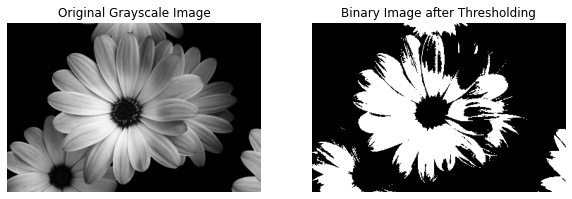

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def global_thresholding(image, threshold_value):
    binary_image = np.zeros_like(image)
    height, width = image.shape
    
    for i in range(height):
        for j in range(width):
            if image[i, j] > threshold_value:
                binary_image[i, j] = 255
            else:
                binary_image[i, j] = 0
    
    return binary_image

image_path = 'im3.jpg'
manual_threshold = 127

# Load the image
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply global thresholding
binary_image = global_thresholding(original_image, manual_threshold)

plt.figure(figsize=[10, 5])
    
plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Binary Image after Thresholding")
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

(240, 360)


(-0.5, 359.5, 239.5, -0.5)

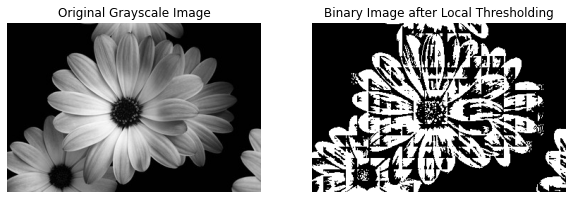

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def calculate_local_threshold(block):
    """Calculate the local threshold for a block of the image."""
    return np.mean(block)  # Use the mean intensity value of the block as the local threshold

def local_thresholding(image, block_size):
    height, width = image.shape
    print(image.shape)
    binary_image = np.zeros_like(image)
    
    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            block = image[i:i+block_size, j:j+block_size]
            local_thresh = calculate_local_threshold(block)
            
            for x in range(block.shape[0]):
                for y in range(block.shape[1]):
                    if block[x, y] > local_thresh:
                        binary_image[i + x, j + y] = 255
                    else:
                        binary_image[i + x, j + y] = 0
    
    return binary_image

image_path = 'im3.jpg'
    
# Block size for local thresholding
block_size = 16  # You can adjust this value as needed
    
# Load the image
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
# Apply local thresholding
binary_image = local_thresholding(original_image, block_size)
    
plt.figure(figsize=[10, 5])
    
plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Binary Image after Local Thresholding")
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
    

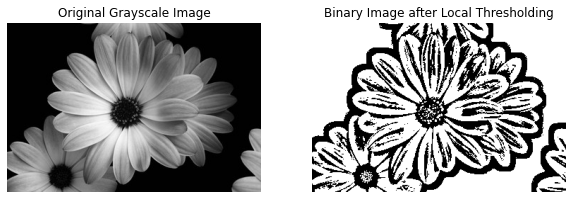

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Block size for local thresholding (must be odd and greater than 1)
block_size = 16  # You can adjust this value as needed
if block_size % 2 == 0:  # Ensure block size is odd
    block_size += 1

# Load the image
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

C = 2

# Apply local thresholding
binary_image = cv2.adaptiveThreshold(original_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,block_size,C)

# Display the images
plt.figure(figsize=[10, 5])

plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Binary Image after Local Thresholding")
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.show()

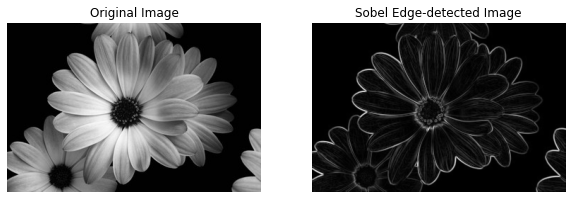

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('im3.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Sobel edge detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)

# Display the original and Sobel edge-detected images
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge-detected Image')
plt.axis('off')

plt.show()

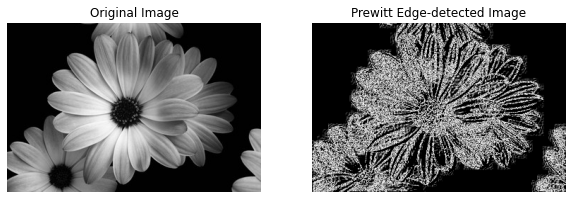

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('im3.jpg', cv2.IMREAD_GRAYSCALE)

# Define the Prewitt kernels
kernel_x = np.array([[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]])

kernel_y = np.array([[-1, -1, -1],
                     [0, 0, 0],
                     [1, 1, 1]])

# Apply convolution with the Prewitt kernels
prewitt_x = cv2.filter2D(image, -1, kernel_x)
prewitt_y = cv2.filter2D(image, -1, kernel_y)

# Calculate the magnitude of gradients
prewitt_combined = np.sqrt(prewitt_x**2 + prewitt_y**2)

# Display the original and Prewitt edge-detected images
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(prewitt_combined, cmap='gray')
plt.title('Prewitt Edge-detected Image')
plt.axis('off')

plt.show()

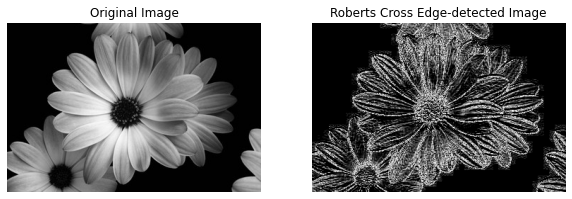

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('im3.jpg', cv2.IMREAD_GRAYSCALE)

# Define the Roberts Cross kernels
kernel_x = np.array([[1, 0],
                     [0, -1]])

kernel_y = np.array([[0, 1],
                     [-1, 0]])

# Apply convolution with the Roberts Cross kernels
roberts_x = cv2.filter2D(image, -1, kernel_x)
roberts_y = cv2.filter2D(image, -1, kernel_y)

# Calculate the magnitude of gradients
roberts_combined = np.sqrt(roberts_x**2 + roberts_y**2)

# Display the original and Roberts Cross edge-detected images
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(roberts_combined, cmap='gray')
plt.title('Roberts Cross Edge-detected Image')
plt.axis('off')

plt.show()


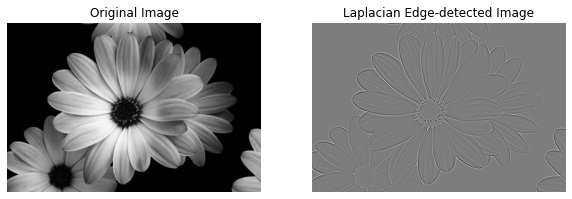

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('im3.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Laplacian edge detection
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Display the original and Laplacian edge-detected images
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian Edge-detected Image')
plt.axis('off')

plt.show()


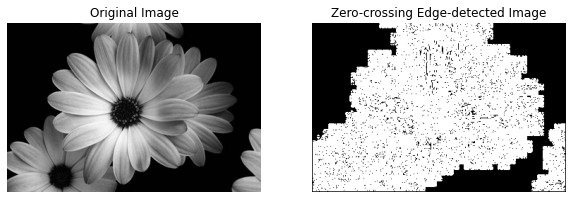

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('im3.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Laplacian edge detection
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Find zero-crossings in the Laplacian image
rows, cols = laplacian.shape
zero_crossings = np.zeros_like(laplacian, dtype=np.uint8)
for i in range(1, rows-1):
    for j in range(1, cols-1):
        neighbors = [laplacian[i-1, j], laplacian[i+1, j], laplacian[i, j-1], laplacian[i, j+1],
                     laplacian[i-1, j-1], laplacian[i-1, j+1], laplacian[i+1, j-1], laplacian[i+1, j+1]]
        if np.any(np.multiply(neighbors, laplacian[i, j]) < 0):
            zero_crossings[i, j] = 255

# Display the original and zero-crossing edge-detected images
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(zero_crossings, cmap='gray')
plt.title('Zero-crossing Edge-detected Image')
plt.axis('off')

plt.show()


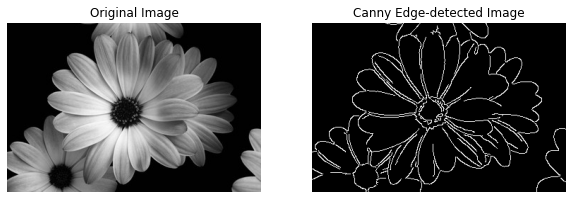

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('im3.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Perform Canny edge detection
edges = cv2.Canny(blurred, 50, 150)  # Adjust thresholds as needed

# Display the original and Canny edge-detected images
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge-detected Image')
plt.axis('off')

plt.show()


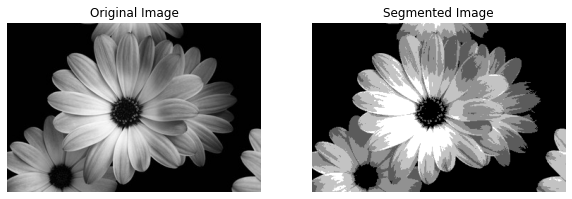

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('im3.jpg', cv2.IMREAD_GRAYSCALE)

# Reshape the image into a 2D array of pixels
pixels = image.reshape((-1, 1))

# Convert to float32
pixels = np.float32(pixels)

# Define criteria and apply k-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 5  # Number of clusters
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to 8-bit values
centers = np.uint8(centers)

# Map the labels to their respective centers
segmented_image = centers[labels.flatten()]

# Reshape back to the original image dimensions
segmented_image = segmented_image.reshape(image.shape)

# Display the original and segmented images
plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')

plt.show()
